In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


import warnings
warnings.filterwarnings("ignore")

## 5 Year Breakeven Data

In [2]:
y5_BE = pd.read_csv("data/T5YIE.csv")
y5_BE.columns = ["Date", "5Y_Breakeven"]
y5_BE = y5_BE.set_index("Date")
y5_BE.index = pd.to_datetime(y5_BE.index)
y5_BE.head()

,5Y_Breakeven
Date,
2003-01-02,1.30
2003-01-03,1.28
2003-01-06,1.31
2003-01-07,1.28
2003-01-08,1.33


## Event Data

In [3]:
CPI_release = pd.read_excel("data/release_dates.xlsx")
CPI_release.columns = ["Date"]
CPI_release = CPI_release.set_index("Date")
CPI_release["CPI Release Date"] = True
CPI_release.index = pd.to_datetime(CPI_release.index)
CPI_release

,CPI Release Date
Date,
1949-03-24,True
1949-04-22,True
1949-05-23,True
1949-06-24,True
1949-07-22,True
...,...
2025-01-15,True
2025-02-12,True
2025-03-12,True


In [4]:
UNR_release = pd.read_excel("data/release_dates_50.xlsx")
UNR_release.columns = ["Date"]
UNR_release = UNR_release.set_index("Date")
UNR_release["UNR Release Date"] = True
UNR_release.index = pd.to_datetime(UNR_release.index)
UNR_release

,UNR Release Date
Date,
1955-05-06,True
1955-06-07,True
1955-07-08,True
1955-08-09,True
1955-09-07,True
...,...
2025-01-10,True
2025-02-07,True
2025-03-07,True


In [5]:
inflation_event = y5_BE.join(CPI_release)
inflation_event = inflation_event.fillna(False)
inflation_event["5Y_Breakeven_change"] = inflation_event["5Y_Breakeven"].diff()
inflation_event = inflation_event.dropna()
inflation_event.head()

,5Y_Breakeven,CPI Release Date,5Y_Breakeven_change
Date,,,
2003-01-03,1.28,False,-0.02
2003-01-06,1.31,False,0.03
2003-01-07,1.28,False,-0.03
2003-01-08,1.33,False,0.05
2003-01-09,1.41,False,0.08


In [6]:
event_data = inflation_event.join(UNR_release)
event_data = event_data.fillna(False)
event_data["Event Release Date"] = (event_data["UNR Release Date"] | event_data["CPI Release Date"])
event_data

,5Y_Breakeven,CPI Release Date,5Y_Breakeven_change,UNR Release Date,Event Release Date
Date,,,,,
2003-01-03,1.28,False,-0.02,False,False
2003-01-06,1.31,False,0.03,False,False
2003-01-07,1.28,False,-0.03,False,False
2003-01-08,1.33,False,0.05,False,False
2003-01-09,1.41,False,0.08,False,False
...,...,...,...,...,...
2025-05-12,2.35,False,-0.04,False,False
2025-05-13,2.38,True,0.03,False,True
2025-05-14,2.44,False,0.06,False,False


In [7]:
event_occ = event_data.loc[event_data["Event Release Date"]]
event_occ

,5Y_Breakeven,CPI Release Date,5Y_Breakeven_change,UNR Release Date,Event Release Date
Date,,,,,
2003-01-10,1.4,False,-0.01,True,True
2003-01-16,1.4,True,-0.01,False,True
2003-02-07,1.6,False,-0.02,True,True
2003-02-21,1.73,True,0.04,False,True
2003-03-07,1.74,False,0.01,True,True
...,...,...,...,...,...
2025-03-12,2.53,True,0.03,False,True
2025-04-04,2.34,False,-0.16,True,True
2025-04-10,2.32,True,-0.13,False,True


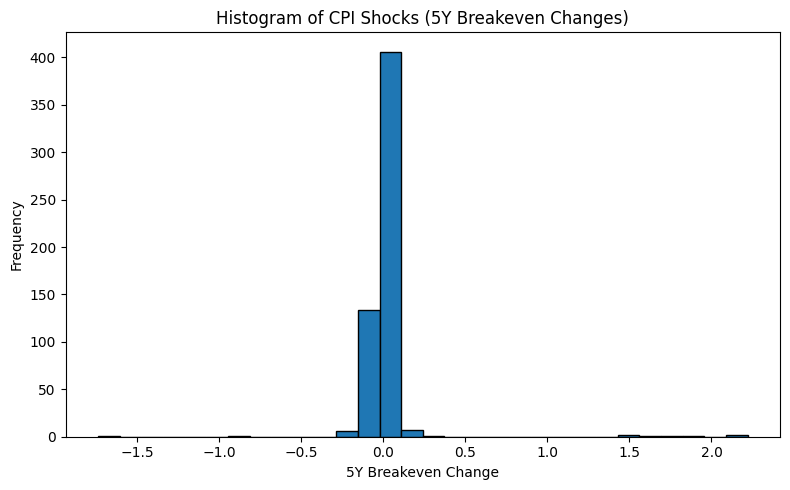

In [8]:
plt.figure(figsize=(8, 5))
plt.hist(event_occ["5Y_Breakeven_change"], bins=30, edgecolor='black')
plt.title("Histogram of CPI Shocks (5Y Breakeven Changes)")
plt.xlabel("5Y Breakeven Change")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

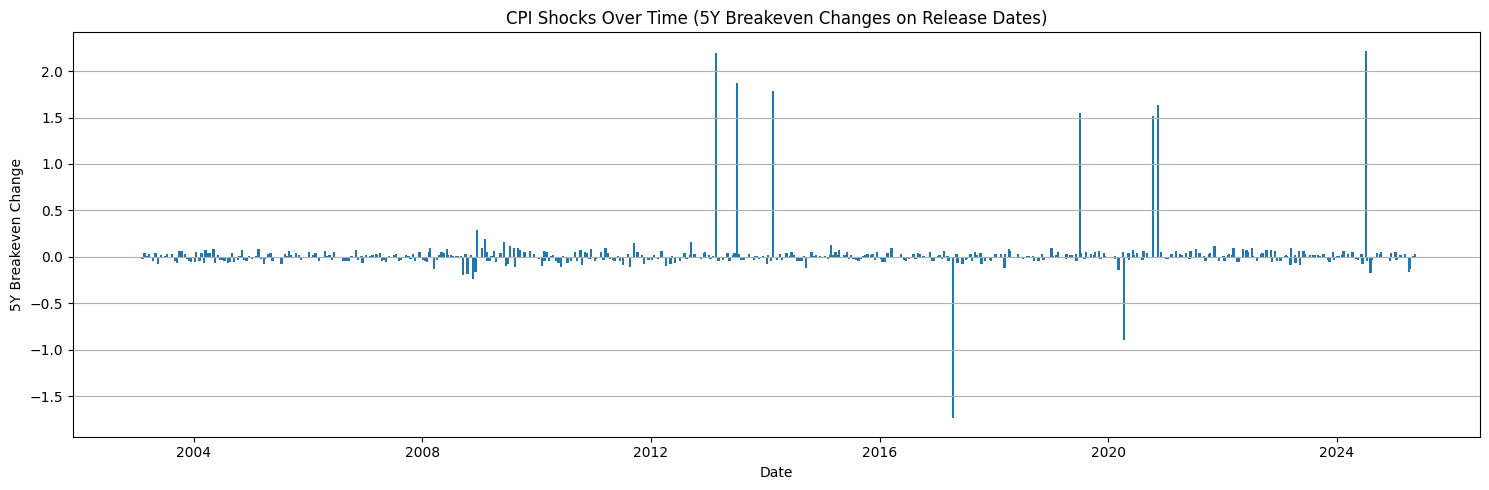

In [9]:
plt.figure(figsize=(15, 5))
plt.bar(event_occ.index, event_occ["5Y_Breakeven_change"], width=15)  # Width in days
plt.title("CPI Shocks Over Time (5Y Breakeven Changes on Release Dates)")
plt.xlabel("Date")
plt.ylabel("5Y Breakeven Change")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [10]:
nonevent_data = event_data.loc[(event_data["Event Release Date"] == False)]
nonevent_data

,5Y_Breakeven,CPI Release Date,5Y_Breakeven_change,UNR Release Date,Event Release Date
Date,,,,,
2003-01-03,1.28,False,-0.02,False,False
2003-01-06,1.31,False,0.03,False,False
2003-01-07,1.28,False,-0.03,False,False
2003-01-08,1.33,False,0.05,False,False
2003-01-09,1.41,False,0.08,False,False
...,...,...,...,...,...
2025-05-09,2.39,False,0.00,False,False
2025-05-12,2.35,False,-0.04,False,False
2025-05-14,2.44,False,0.06,False,False


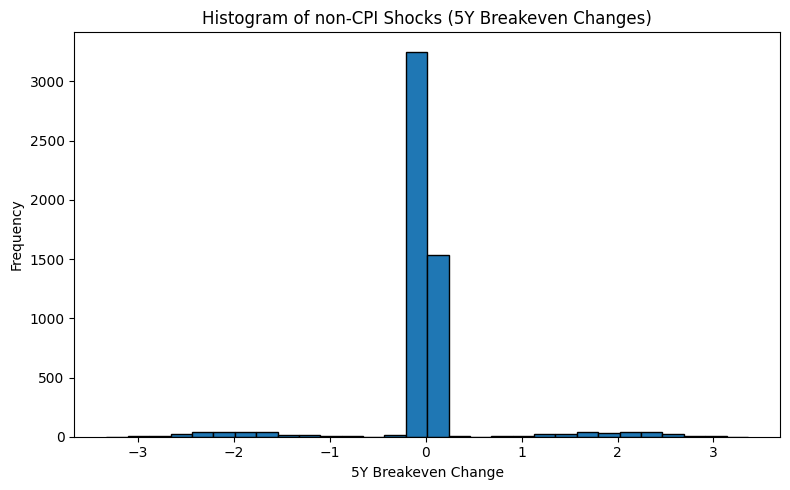

In [11]:
plt.figure(figsize=(8, 5))
plt.hist(nonevent_data["5Y_Breakeven_change"], bins=30, edgecolor='black')
plt.title("Histogram of non-CPI Shocks (5Y Breakeven Changes)")
plt.xlabel("5Y Breakeven Change")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

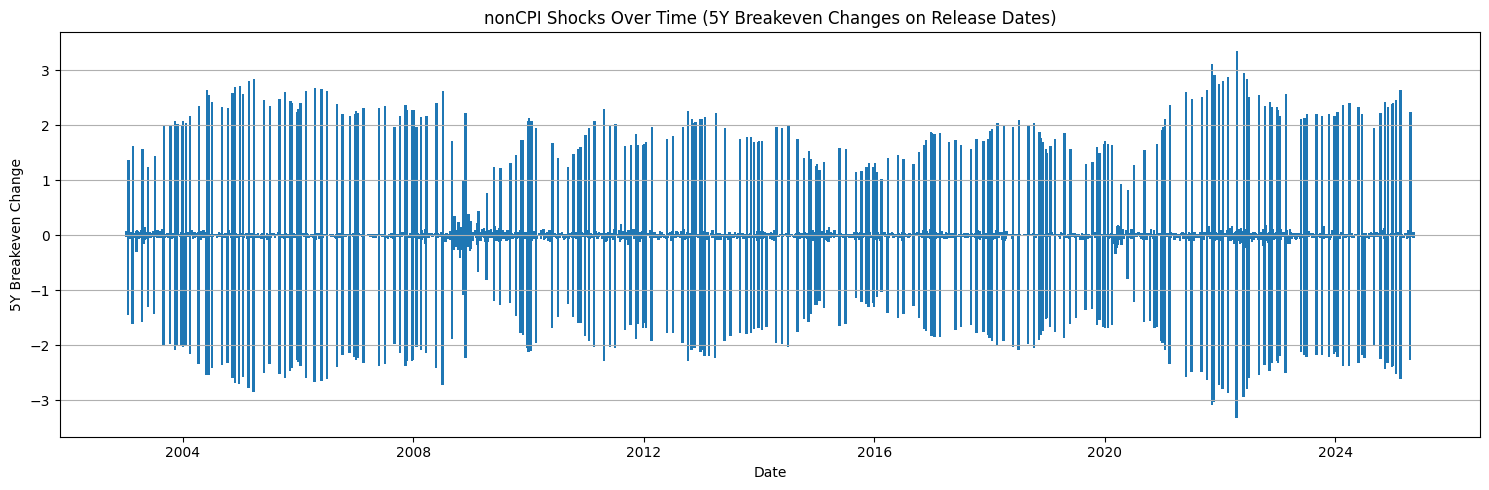

In [12]:
plt.figure(figsize=(15, 5))
plt.bar(nonevent_data.index, nonevent_data["5Y_Breakeven_change"], width=15)  # Width in days
plt.title("nonCPI Shocks Over Time (5Y Breakeven Changes on Release Dates)")
plt.xlabel("Date")
plt.ylabel("5Y Breakeven Change")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [13]:
tickers = pd.read_csv("data/SPY_IWM.csv")
tickers = tickers.rename(columns={"Price":"Date", "Close":"IWM Close", "Close.1":"SPY Close"}).iloc[2:][['Date', 'IWM Close', 'SPY Close']].set_index("Date")
tickers = tickers.dropna().astype(float)

In [14]:
tickers["SPY returns"] = tickers["SPY Close"].pct_change()
tickers["IWM returns"] = tickers["IWM Close"].pct_change()
tickers.head()

,IWM Close,SPY Close,SPY returns,IWM returns
Date,,,,
2000-05-26,33.020184,87.911804,NaN,NaN
2000-05-30,34.238968,90.778534,0.032609,0.036910
2000-05-31,34.363113,90.977615,0.002193,0.003626
2000-06-01,35.141785,92.570145,0.017505,0.022660
2000-06-02,36.969967,94.182655,0.017419,0.052023


In [15]:
tickers["spread"] = tickers["SPY returns"] - tickers["IWM returns"]
tickers.head()

,IWM Close,SPY Close,SPY returns,IWM returns,spread
Date,,,,,
2000-05-26,33.020184,87.911804,NaN,NaN,NaN
2000-05-30,34.238968,90.778534,0.032609,0.036910,-0.004301
2000-05-31,34.363113,90.977615,0.002193,0.003626,-0.001433
2000-06-01,35.141785,92.570145,0.017505,0.022660,-0.005155
2000-06-02,36.969967,94.182655,0.017419,0.052023,-0.034604


In [18]:
infl_df = pd.read_csv("data/T5YIE.csv")
yld5_df = pd.read_csv("data/DGS5.csv")

In [25]:
yr5_df = pd.merge(infl_df, yld5_df, left_on="observation_date", right_on="observation_date").rename(columns={"observation_date":"Date"}).set_index("Date")

In [27]:
yr5_df['T5YIE diff'] = yr5_df['T5YIE'].diff()
yr5_df['DGS5 diff'] = yr5_df['DGS5'].diff()

In [31]:
comb_df = pd.merge(tickers, yr5_df, left_index=True, right_index=True).dropna()

In [32]:
comb_df.head()

,IWM Close,SPY Close,SPY returns,IWM returns,spread,T5YIE,DGS5,T5YIE diff,DGS5 diff
Date,,,,,,,,,
2003-01-03,28.993994,60.348682,0.003074,-0.001668,0.004742,1.28,3.03,-0.02,-0.02
2003-01-06,29.333246,61.412285,0.017624,0.011701,0.005924,1.31,3.10,0.03,0.07
2003-01-07,29.180405,61.260349,-0.002474,-0.005211,0.002736,1.28,3.04,-0.03,-0.06
2003-01-08,28.889595,60.375107,-0.014450,-0.009966,-0.004485,1.33,3.01,0.05,-0.03
2003-01-09,29.314598,61.313217,0.015538,0.014711,0.000827,1.41,3.23,0.08,0.22


In [35]:
adj_comb_df = comb_df.loc['2020-01-01':]

In [36]:
adj_comb_df.head()

,IWM Close,SPY Close,SPY returns,IWM returns,spread,T5YIE,DGS5,T5YIE diff,DGS5 diff
Date,,,,,,,,,
2020-01-03,154.478455,298.017731,-0.007572,-0.003921,-0.003651,1.69,1.59,-0.03,-0.08
2020-01-06,154.684280,299.154663,0.003815,0.001332,0.002483,1.69,1.61,0.00,0.02
2020-01-07,154.169754,298.313477,-0.002812,-0.003326,0.000514,1.67,1.62,-0.02,0.01
2020-01-08,154.646866,299.903351,0.005330,0.003095,0.002235,1.68,1.67,0.01,0.05
2020-01-09,154.833954,301.936920,0.006781,0.001210,0.005571,1.67,1.65,-0.01,-0.02


In [39]:
def graph_indicator_quantiles(data_df, indicator_cols, thresold=0.025, date_cutoff="2020-01-01"):
    res_df = data_df.loc[date_cutoff:]

    for ind in indicator_cols:
        s = res_df[ind]

        lower = s.quantile(thresold)
        upper = s.quantile(1 - thresold)

        # 2) plot the histogram
        plt.figure()
        plt.hist(s, bins=30, edgecolor='black')

        # 3) add vertical lines at the cutoffs
        plt.axvline(lower, linestyle='--', linewidth=2)
        plt.axvline(upper, linestyle='--', linewidth=2)

        plt.title(f"Histogram of {ind} with 2.5%–97.5% thresholds")
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.show()


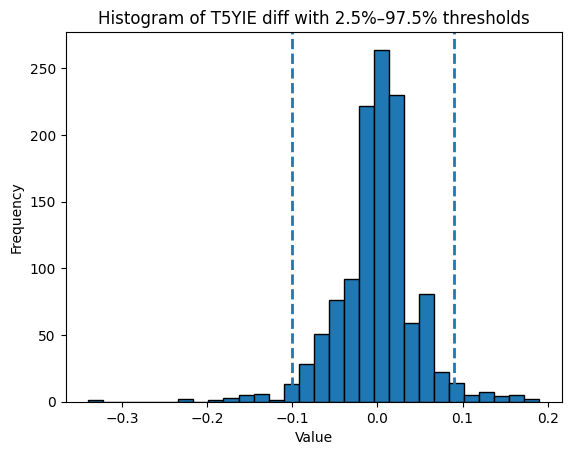

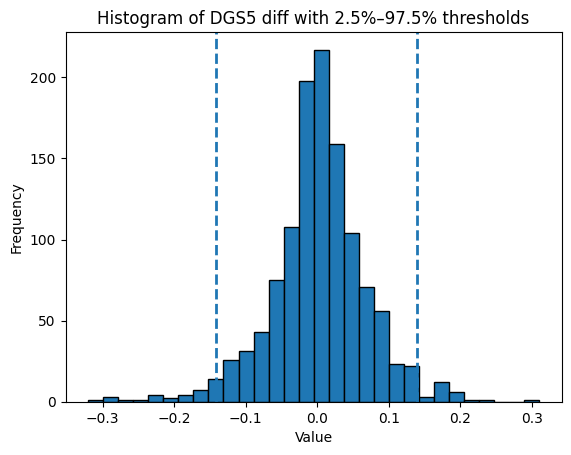

In [41]:
graph_indicator_quantiles(comb_df, ['T5YIE diff', 'DGS5 diff'])

In [ ]:
def backtest_output(base_data_df,
                    ind_cols,
                    ret_cols,
                    min_date="2020-01-01",
                    threshold=0.025,
                    lag_cols=[0, 1, 2],
                    intercept=False):
    """
    Runs, for each lag, indicator, and return:
      • threshold quantiles of indicator
      • OLS of ret_{t+lag} ~ α + β ind_t
      • stats: beta, alpha, p-value, R², % sign match
      • strategy returns series: long if ŕhat≥0, short otherwise
      • plots per-period strat_ret and cumulative P&L
    Returns a summary DataFrame of the stats.
    """
    data = base_data_df.loc[min_date:].copy()
    rows = []

    for lag in lag_cols:
        for ind in ind_cols:
            s = data[ind].dropna()
            lower_q = s.quantile(threshold)
            upper_q = s.quantile(1 - threshold)

            for ret in ret_cols:
                # future return series
                y = data[ret].shift(-lag)

                # align and drop NaNs
                df = pd.concat([s, y], axis=1).dropna()
                df.columns = ['ind', 'ret']

                # design matrix
                X = df[['ind']]
                if intercept:
                    X = sm.add_constant(X)

                # fit OLS
                model = sm.OLS(df['ret'], X).fit()
                beta  = model.params['ind']
                alpha = model.params.get('const', 0.0)

                # how often sign(ind) == sign(ret)
                pct_sign_match = (np.sign(df['ind']) == np.sign(df['ret'])).mean()

                # predicted returns & strategy P/L
                y_hat     = model.predict(X)
                pos       = np.where(y_hat >= 0, 1, -1)
                strat_ret = pd.Series(pos * df['ret'].values, index=df.index)

                # compute summary stats
                mean_strat = strat_ret.mean()
                cum_strat  = strat_ret.cumsum() # no trade size changes

                rows.append({
                    'lag': lag,
                    'indicator': ind,
                    'return': ret,
                    'lower_threshold': lower_q,
                    'upper_threshold': upper_q,
                    'beta': beta,
                    'intercept': alpha,
                    'p_value': model.pvalues['ind'],
                    'r_squared': model.rsquared,
                    'pct_sign_match': pct_sign_match,
                    'mean_strat_return': mean_strat,
                    'cum_strat_return': cum_strat
                })

                # ——— PLOTS ———
                # 1) per-period strategy returns
                plt.figure(figsize=(10, 3))
                plt.plot(strat_ret.index, strat_ret, label='Strategy Ret')
                plt.axhline(0, color='gray', linewidth=1)
                plt.title(f"Strat Ret (lag={lag}, ind={ind}, ret={ret})")
                plt.ylabel("Return")
                plt.legend()
                plt.show()

                # 2) cumulative performance
                cum = (1 + strat_ret).cumprod() - 1
                plt.figure(figsize=(10, 3))
                plt.plot(cum.index, cum, label='Cumulative P&L')
                plt.title(f"Cumulative Strat P&L (lag={lag}, ind={ind}, ret={ret})")
                plt.ylabel("Cumulative Return")
                plt.legend()
                plt.show()

    return pd.DataFrame(rows)


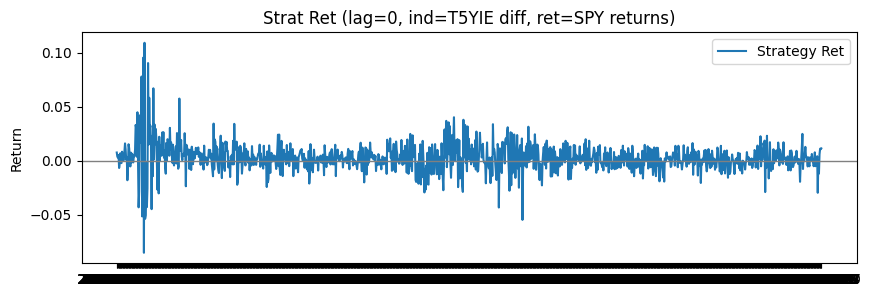

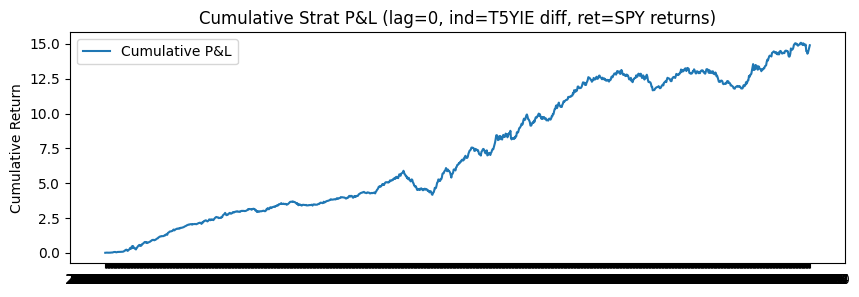

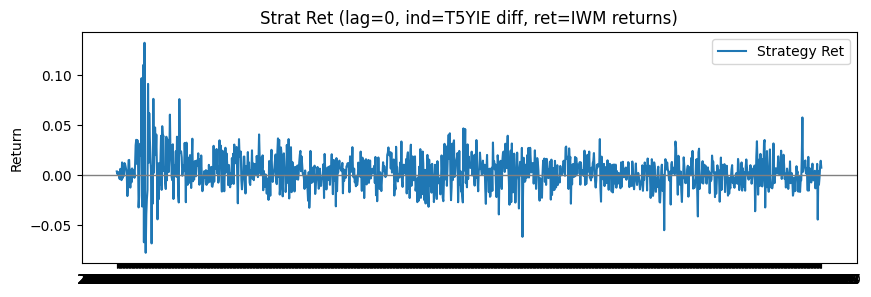

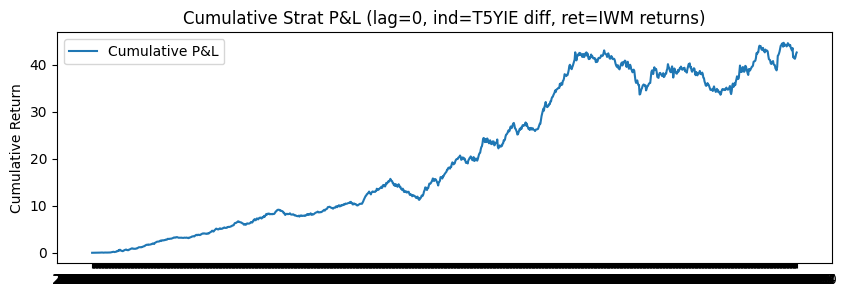

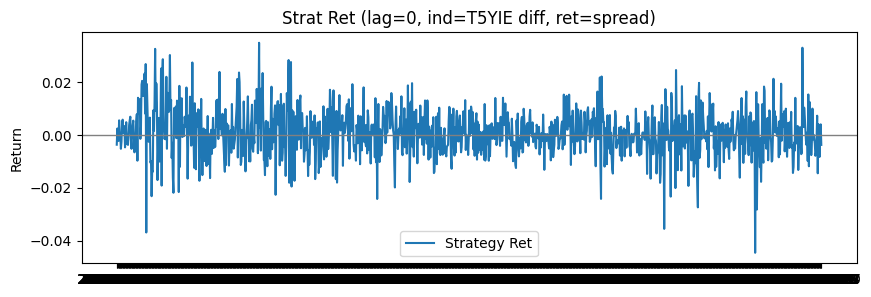

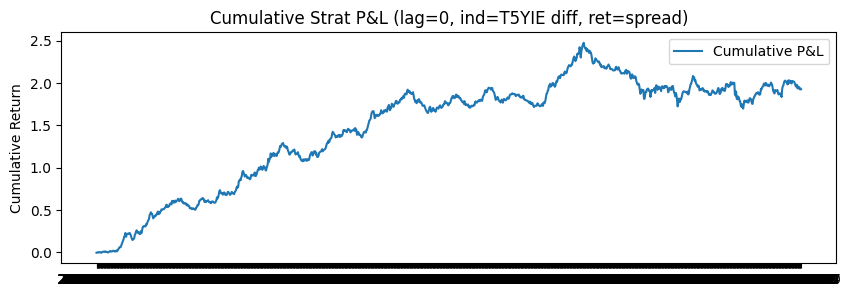

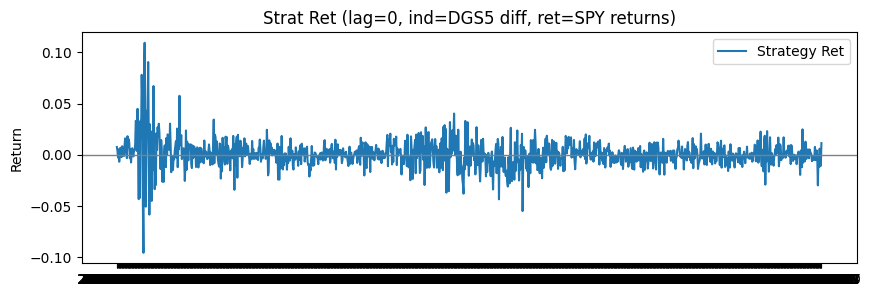

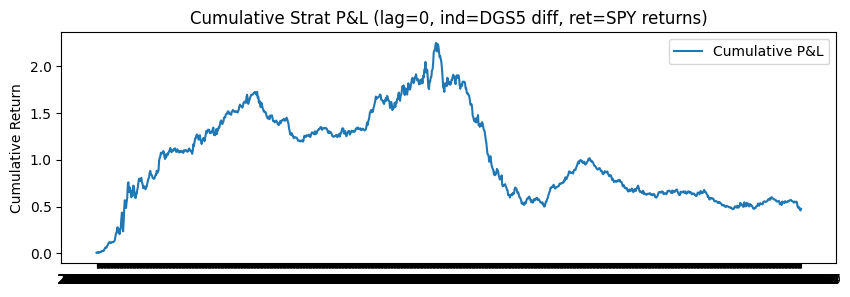

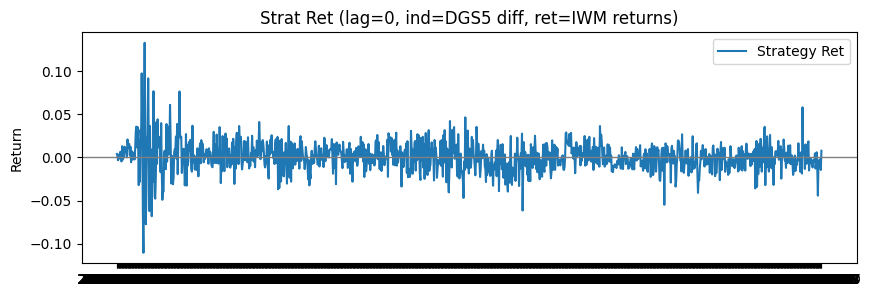

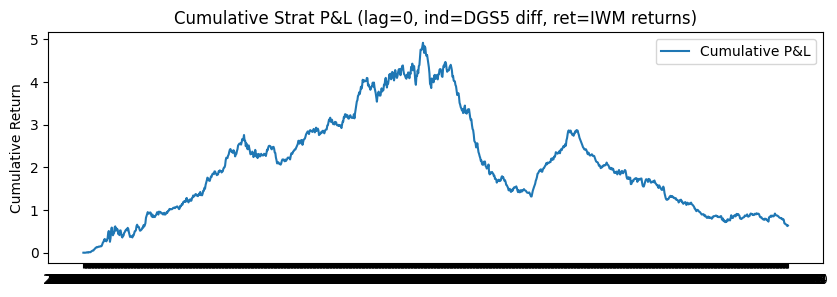

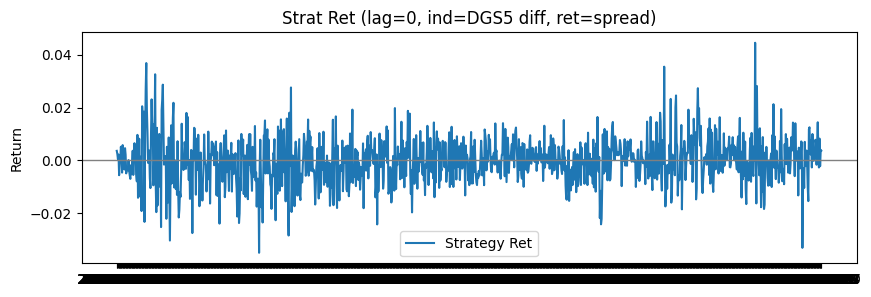

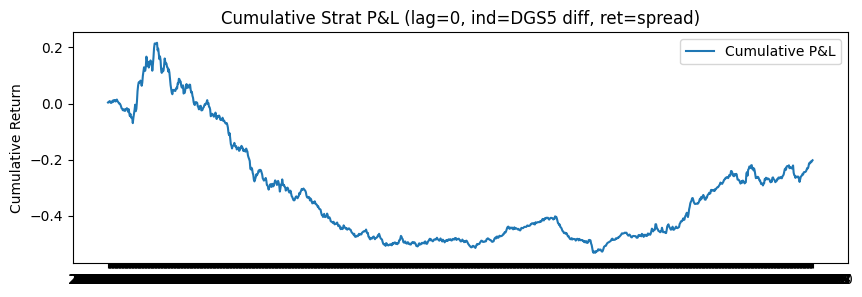

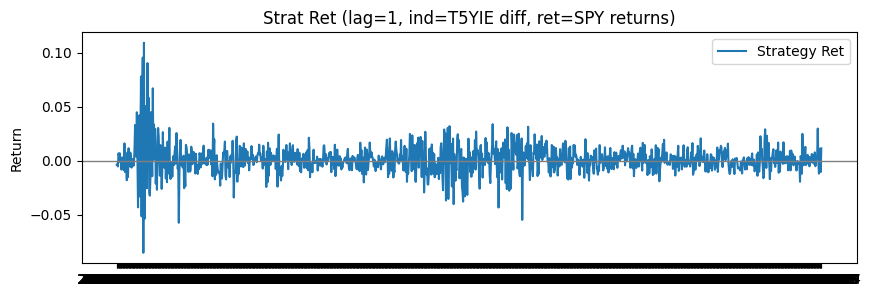

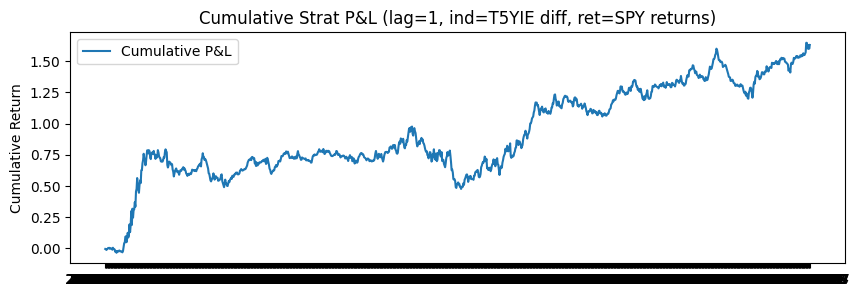

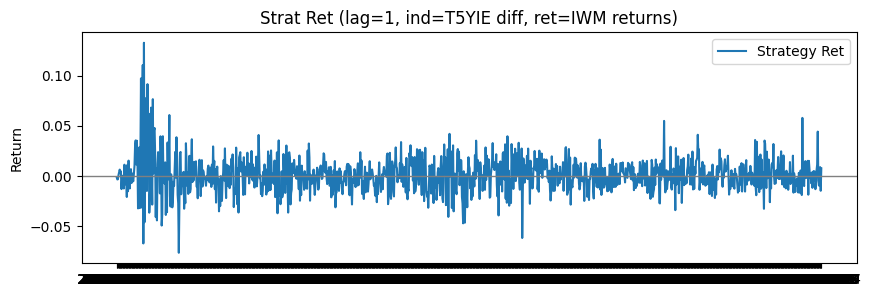

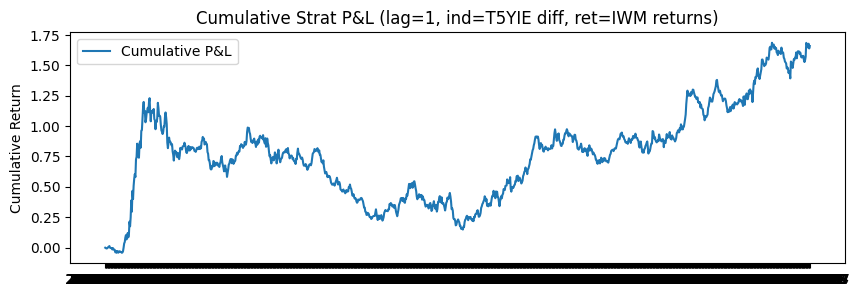

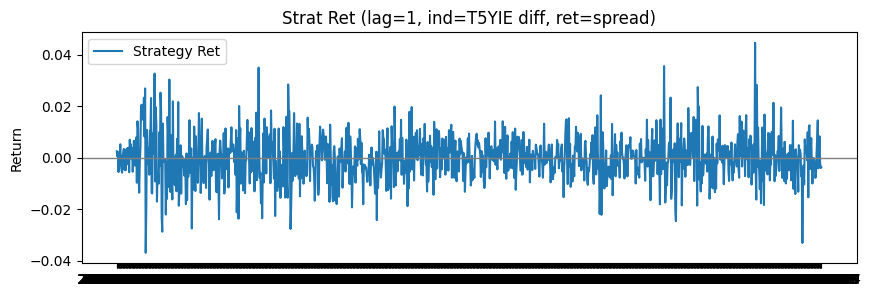

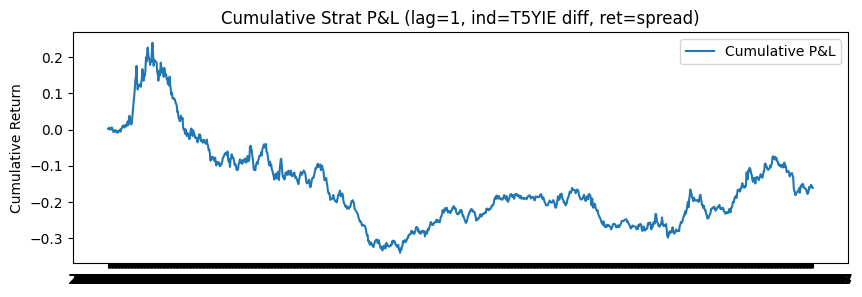

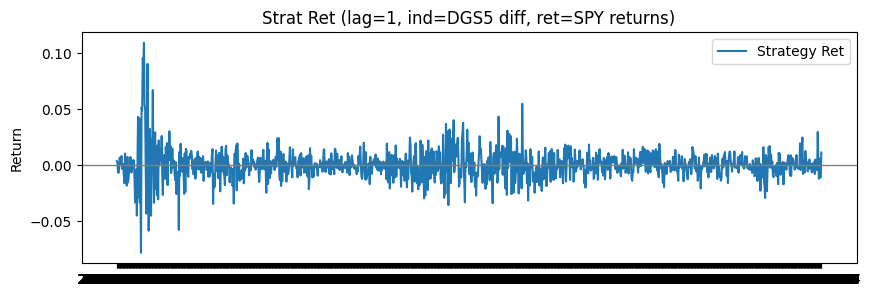

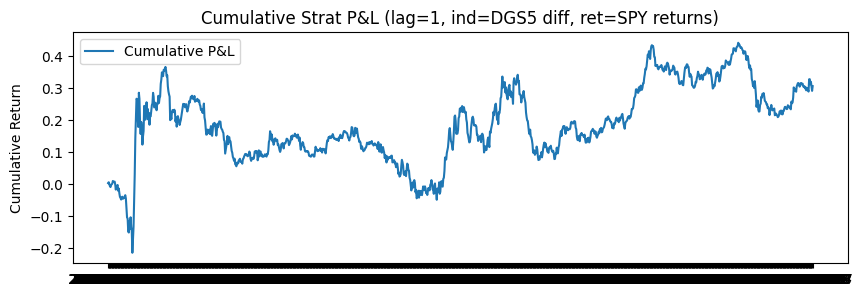

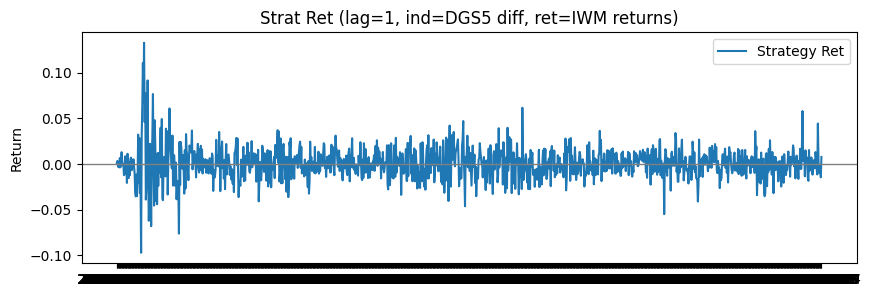

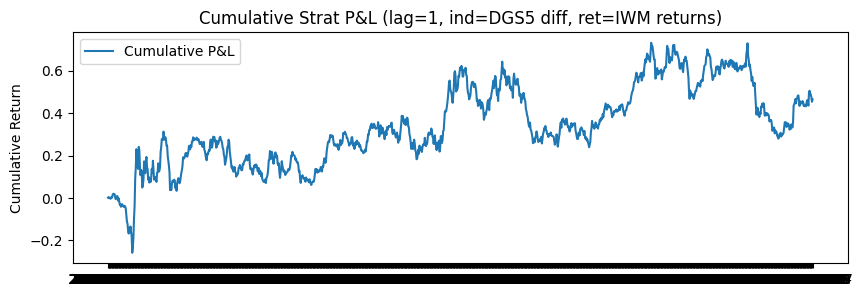

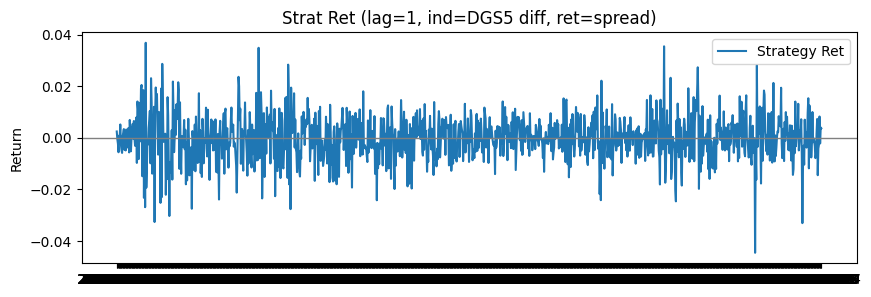

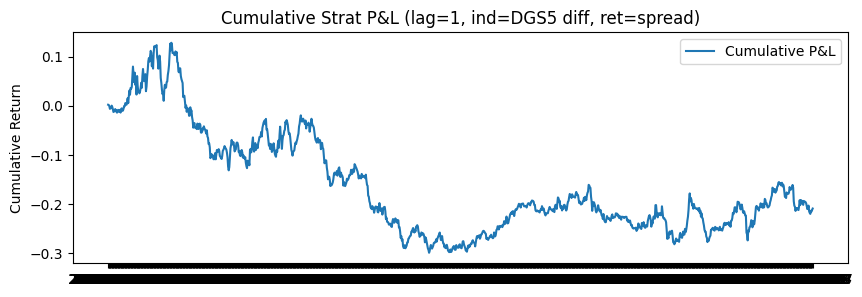

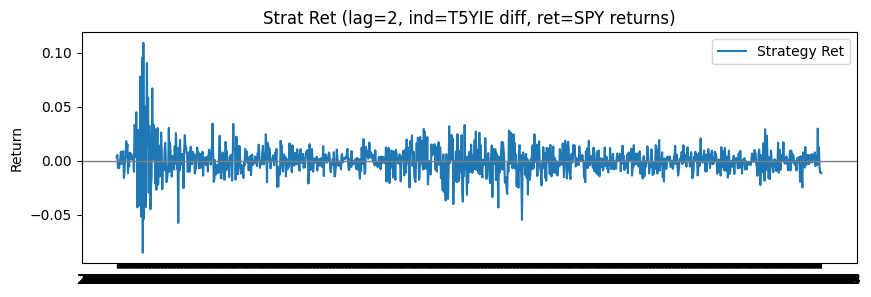

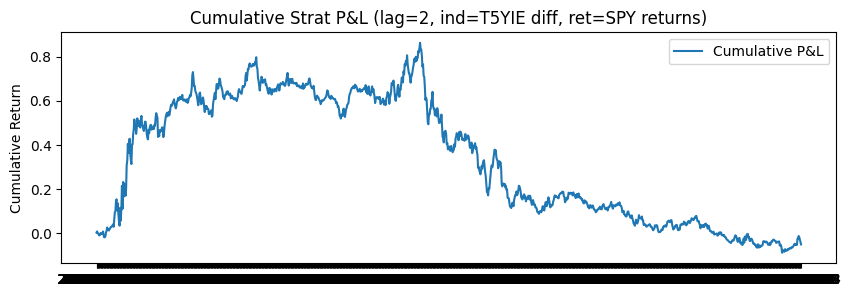

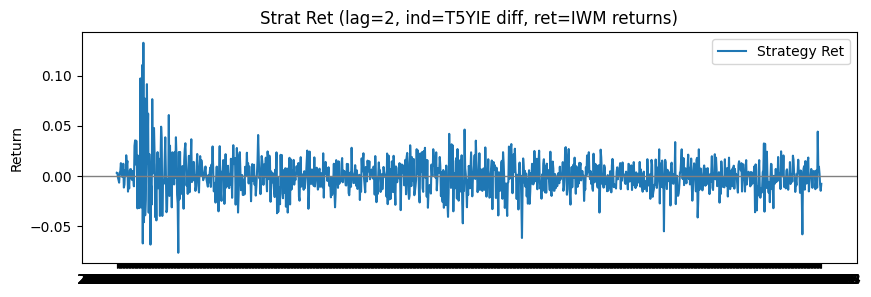

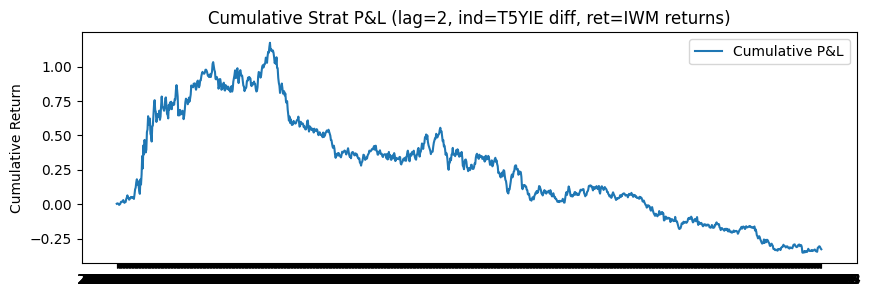

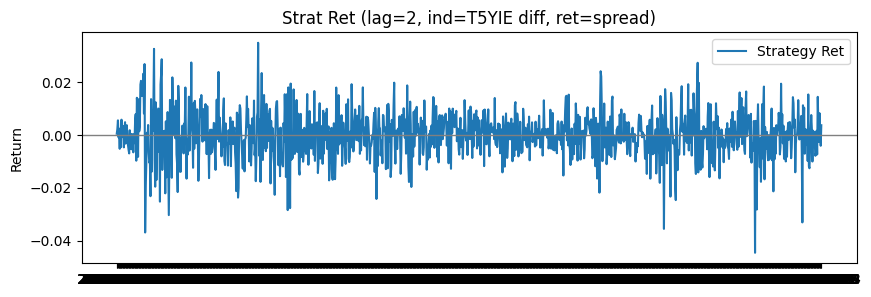

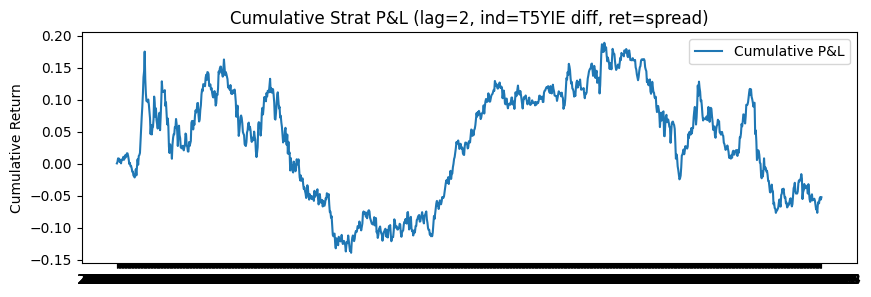

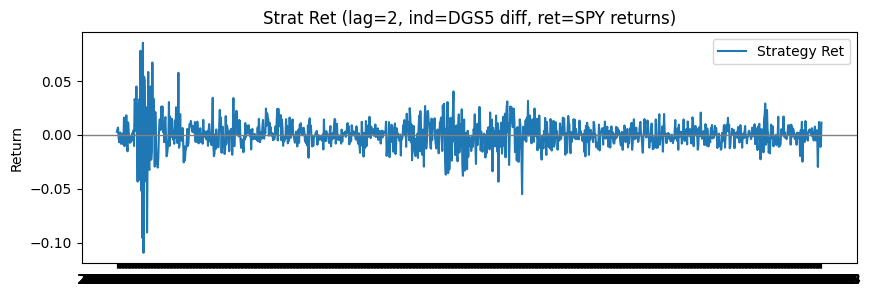

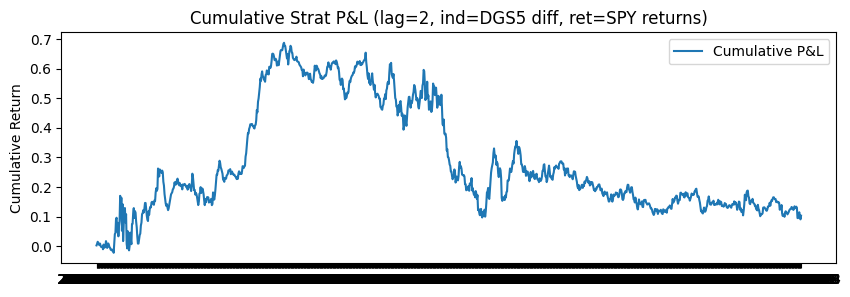

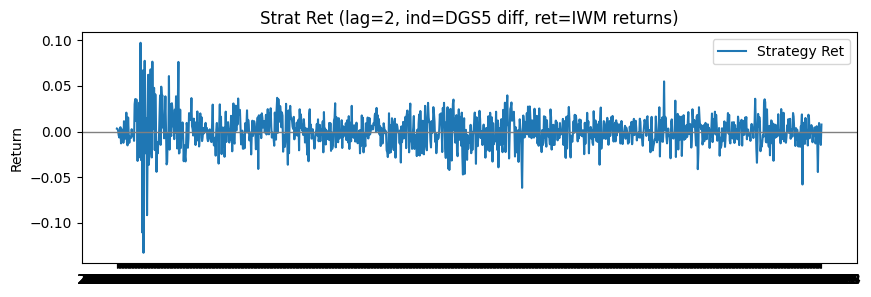

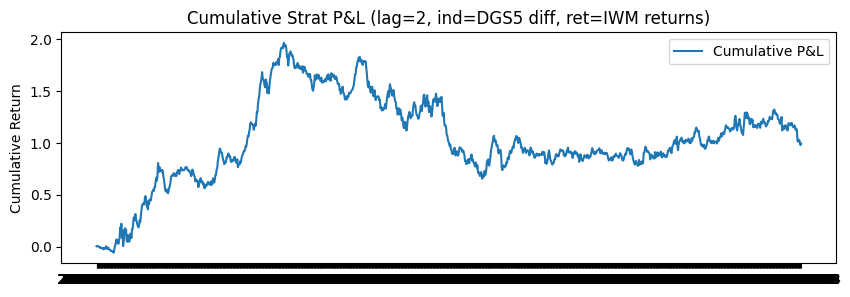

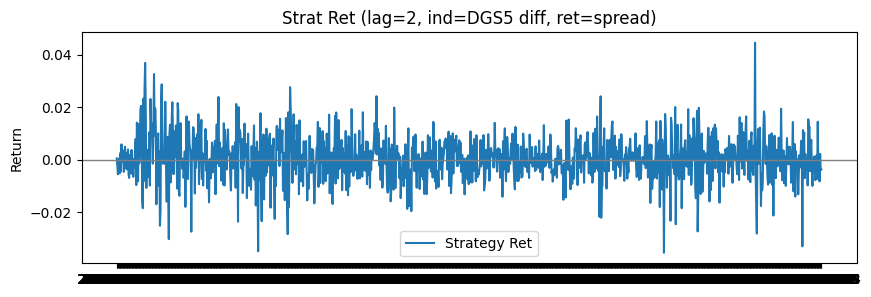

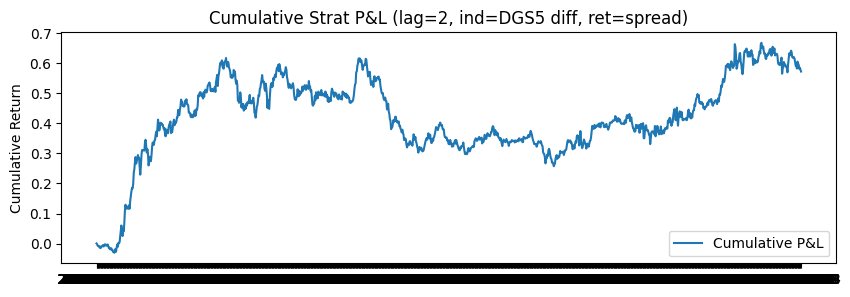

,lag,indicator,return,lower_threshold,upper_threshold,beta,intercept,p_value,r_squared,pct_sign_match,mean_strat_return,cum_strat_return
0,0,T5YIE diff,SPY returns,-0.10000,0.09,0.075758,0.0,1.167721e-20,0.070245,0.522613,0.002406,Date 2020-01-03 0.007572 2020-01-06 0.01...
1,0,T5YIE diff,IWM returns,-0.10000,0.09,0.103892,0.0,6.463475e-23,0.078228,0.532663,0.003312,Date 2020-01-03 0.003921 2020-01-06 0.00...
2,0,T5YIE diff,spread,-0.10000,0.09,-0.028134,0.0,2.138189e-07,0.022308,0.413735,0.000938,Date 2020-01-03 -0.003651 2020-01-06 -0.00...
3,0,DGS5 diff,SPY returns,-0.14175,0.14,0.006150,0.0,2.923418e-01,0.000929,0.458124,0.000415,Date 2020-01-03 0.007572 2020-01-06 0.01...
4,0,DGS5 diff,IWM returns,-0.14175,0.14,0.001460,0.0,8.474540e-01,0.000031,0.477387,0.000565,Date 2020-01-03 0.003921 2020-01-06 0.00...
5,0,DGS5 diff,spread,-0.14175,0.14,0.004689,0.0,2.230129e-01,0.001244,0.438861,-0.000150,Date 2020-01-03 0.003651 2020-01-06 0.00...
6,1,T5YIE diff,SPY returns,-0.10000,0.09,0.007779,0.0,3.474683e-01,0.000741,0.464376,0.000900,Date 2020-01-03 -0.003815 2020-01-06 -0.00...
7,1,T5YIE diff,IWM returns,-0.10000,0.09,0.014744,0.0,1.705456e-01,0.001575,0.457670,0.000970,Date 2020-01-03 -0.001332 2020-01-06 -0.00...
8,1,T5YIE diff,spread,-0.10000,0.09,-0.006965,0.0,2.017193e-01,0.001367,0.450126,-0.000108,Date 2020-01-03 0.002483 2020-01-06 0.00...
9,1,DGS5 diff,SPY returns,-0.14175,0.14,-0.010861,0.0,6.303155e-02,0.002896,0.455155,0.000313,Date 2020-01-03 0.003815 2020-01-06 0.00...


In [52]:
backtest_output(comb_df, ['T5YIE diff', 'DGS5 diff'], ['SPY returns', 'IWM returns', 'spread'])